This notebook focuses on some basics of data analysis: linear regression, optimization and Bayesian inference.


# Least squares linear regression: basics



Let's start by implementing a simple least squares fit using analytical expressions.

Plot the data provided below. Calculate the least squares estimate for the slope $a$ and intercept $b$ ($y=ax+b$) with the analytical formulae mentioned in lectures and add the corresponding line to your plot.

Now recompute the least-squares slope $a$ and intercept $b$ by numerically minimizing/optimizing the least squares loss function $\sum_i (y(x_i)-f(x_i,a,b))^2$. You may wish to use the numerical optimization routine included below. Do you find the same result as in the analytical calculation? Replot the data along with the best fit line you have derived.

Repeat your optimization but with an L1 loss function and add the corresponding line to your plot.



In [1]:
import numpy
import pylab

xarray = numpy.arange(20.)/5
yarray = numpy.array([1.16100793, 2.27070892+8.*0., 1.7102285 , 1.92216664 ,2.00306275 ,3.60437835,
 3.8682993 , 5.51139028, 3.16760897, 4.27715062, 4.22776111, 5.33520844,
 6.50611469, 5.4146256,  7.04786637, 8.44454962, 7.63848438, 7.81296952,
 8.80991074 ,6.62531274])



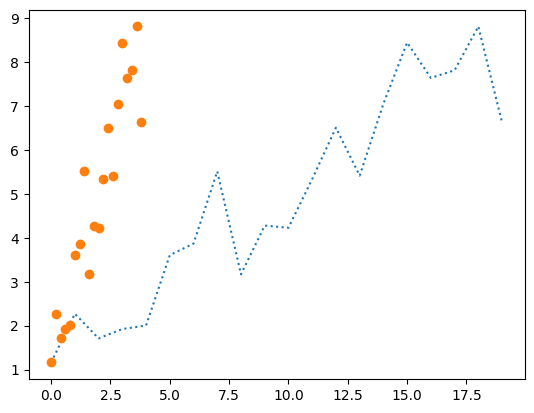

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(yarray, linestyle = 'dotted')
plt.plot(xarray,yarray,'o')

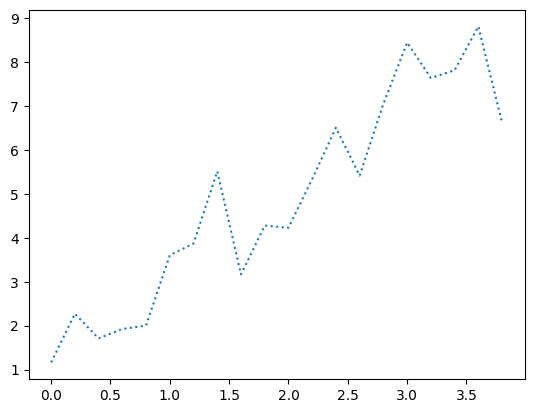

In [3]:
plt.plot(xarray, yarray, linestyle = 'dotted')
plt.show()

In [11]:
def loss(coeff,xarray,yarray):
  #add your loss function here
  prediction = coeff[0] * xarray + coeff[1]
  error = yarray - prediction
  return numpy.mean(error**2)


from scipy.optimize import minimize

start = [1.,1.]

minimum = minimize(loss,x0=start,args=(xarray,yarray),method='BFGS')
#first parameter minimum.x[0], second minimum.x[1] etc.
print(minimum)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.1158386534301823
        x: [ 2.022e+00  1.022e+00]
      nit: 7
      jac: [ 6.407e-07 -4.470e-08]
 hess_inv: [[ 3.644e-01 -6.917e-01]
            [-6.917e-01  1.813e+00]]
     nfev: 24
     njev: 8


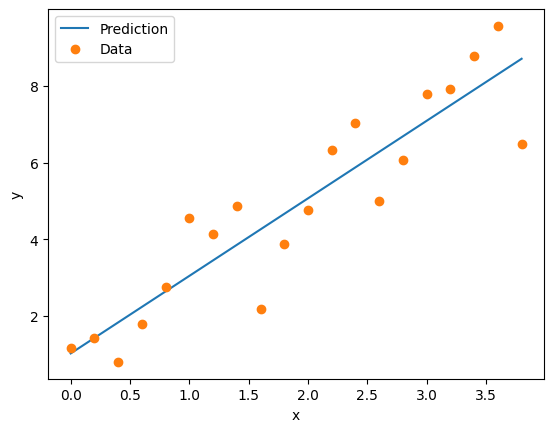

In [12]:
# Extract optimal coefficients
optimal_a = minimum.x[0]
optimal_b = minimum.x[1]

# Calculate the prediction
prediction = optimal_a * xarray + optimal_b

# Plot the prediction
plt.plot(xarray, prediction, label='Prediction')
plt.plot(xarray, yarray, 'o', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ... (Your existing data and model_func remain the same)

def loss_L1(coeff, xarray, yarray):
    """L1 loss function (mean absolute error)."""
    predictions = model_func(xarray, coeff)
    error = yarray - predictions
    return np.mean(np.abs(error))  # Calculate mean absolute error

# Initial guess for the parameters
start = [1., 1., 1.]

# Optimization using BFGS with L1 loss
result_L1 = minimize(loss_L1, x0=start, args=(xarray, yarray), method='BFGS')

# Extract the optimal coefficients
optimal_coeffs_L1 = result_L1.x

print("Optimal Coefficients (a, b, c) using L1 loss:", optimal_coeffs_L1)

# ... (The rest of your plotting code can remain the same)

Optimal Coefficients (a, b, c) using L1 loss: [ 1.96438014  1.12706084 -1.00729791]


In [ ]:
# Generate predictions using the optimal coefficients
y_pred = model_func(xarray, optimal_coeffs_L1)

# Plot the original data and the best-fit model
plt.plot(xarray, yarray, 'o', label='Data')
plt.plot(xarray, y_pred, label='Best-Fit Model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Best-Fit Model')
plt.legend()
plt.show()

Finally, perturb one of the data points so that it is a noticeable outlier, and show that the line derived from L1 optimization is less affected than L2.

# Adding more parameters

Now consider a new data vector, provided below, which contains an oscillatory feature with a known period and phase but an unknown amplitude $c$. Plot the new data. Using L2/least squares optimization and assuming the model function $f=ax+b+c \sin(5x)$, find the best fit three parameter model (described by the parameters $a, b, c$.)

In [ ]:
#new data vector with oscillatory feature
xarray = numpy.arange(20.)/5
yarray = numpy.array([1.16100793, 1.42923794, 0.80093107, 1.78104663, 2.75986525, 4.56330262,
 4.1477148,  4.85440368, 2.17825072, 3.86503213, 4.77178222, 6.33519865,
 7.04268761, 4.99445856, 6.05725901, 7.79426178, 7.9263877,  8.77436701,
 9.56089799, 6.47543553])


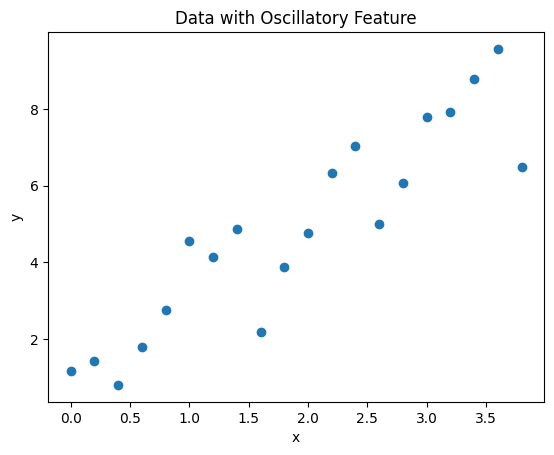

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
xarray = numpy.arange(20.)/5
yarray = numpy.array([1.16100793, 1.42923794, 0.80093107, 1.78104663, 2.75986525, 4.56330262,
 4.1477148,  4.85440368, 2.17825072, 3.86503213, 4.77178222, 6.33519865,
 7.04268761, 4.99445856, 6.05725901, 7.79426178, 7.9263877,  8.77436701,
 9.56089799, 6.47543553])

plt.plot(xarray, yarray, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data with Oscillatory Feature')
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ... (Your existing data and model_func remain the same)

def model_func(x, coeff):
    """Model function: f = a*x + b + c*sin(5*x)"""
    return coeff[0]*x + coeff[1] + coeff[2]*np.sin(5*x)


def loss_L1(coeff, xarray, yarray):
    """L1 loss function (mean absolute error)."""
    predictions = model_func(xarray, coeff)
    error = yarray - predictions
    return np.mean(np.abs(error))  # Calculate mean absolute error

# Initial guess for the parameters
start = [1., 1., 1.]

# Optimization using BFGS with L1 loss
result_L1 = minimize(loss_L1, x0=start, args=(xarray, yarray), method='BFGS')

# Extract the optimal coefficients
optimal_coeffs_L1 = result_L1.x

print("Optimal Coefficients (a, b, c) using L1 loss:", optimal_coeffs_L1)



Optimal Coefficients (a, b, c) using L1 loss: [ 1.96438014  1.12706084 -1.00729791]


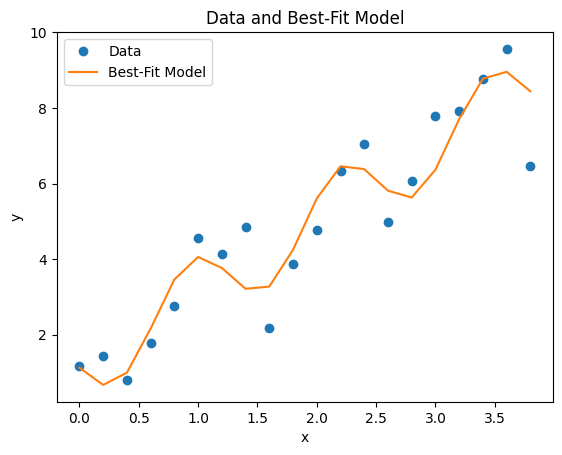

In [15]:
# Generate predictions using the optimal coefficients
y_pred = model_func(xarray, optimal_coeffs_L1)

# Plot the original data and the best-fit model
plt.plot(xarray, yarray, 'o', label='Data')
plt.plot(xarray, y_pred, label='Best-Fit Model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Best-Fit Model')
plt.legend()
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ... (Your existing data and model_func remain the same)

def model_func(x, coeff):
    """Model function: f = a*x + b + c*sin(5*x) + d*cos(5*x)"""
    return coeff[0]*x + coeff[1] + coeff[2]*np.sin(5*x) + coeff[3]*np.cos(5*x)


def loss_L1(coeff, xarray, yarray):
    """L1 loss function (mean absolute error)."""
    predictions = model_func(xarray, coeff)
    error = yarray - predictions
    return np.mean(np.abs(error))  # Calculate mean absolute error

# Initial guess for the parameters
start = [1., 1., 1., 1. ]

# Optimization using BFGS with L1 loss
result_L1_cos = minimize(loss_L1, x0=start, args=(xarray, yarray), method='BFGS')

# Extract the optimal coefficients
optimal_coeffs_L1_cos = result_L1_cos.x

print("Optimal Coefficients (a, b, c, d) using L1 loss:", optimal_coeffs_L1_cos)



Optimal Coefficients (a, b, c, d) using L1 loss: [ 2.10990185  0.92059611 -0.84447143  0.47885523]


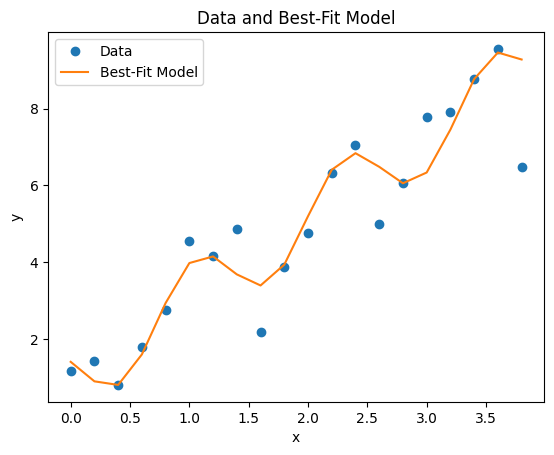

In [17]:
# Generate predictions using the optimal coefficients
y_pred = model_func(xarray, optimal_coeffs_L1_cos)

# Plot the original data and the best-fit model
plt.plot(xarray, yarray, 'o', label='Data')
plt.plot(xarray, y_pred, label='Best-Fit Model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Best-Fit Model')
plt.legend()
plt.show()


# Bayesian Data Analysis

We now turn to Bayesian data analysis. Our original data vector (without oscillations) now has errors, provided below. Write down a likelihood, a prior (you may assume it is just a constant for now), and evaluate the posterior probability on a grid of slope $a$ and intercept $b$ values. Plot this 2D posterior.

In [19]:
#The original data vector, but this time with errors!
xarray = numpy.arange(20.)/5
yarray = numpy.array([1.16100793, 2.27070892, 1.7102285 , 1.92216664 ,2.00306275 ,3.60437835,
 3.8682993 , 5.51139028, 3.16760897, 4.27715062, 4.22776111, 5.33520844,
 6.50611469, 5.4146256,  7.04786637, 8.44454962, 7.63848438, 7.81296952,
 8.80991074 ,6.62531274])
yarrayError = yarray*0.+1.

def loglikelihood(vals):
  a, b = vals
  model = a * xarray + b
  loglike = -0.5 * np.sum((yarray - model) ** 2 / yarrayError ** 2)
  # loglike = #### Write down log(likelihood) function. Vals is 2D array [vals[0],vals[1]]
  return loglike



In [20]:
#### you may wish to use this function
def gridEvaluateFunction(function, xvals, yvals):
    #### returns 2d array of function values evaluated on a, b grid values
    functionValues = numpy.zeros((len(xvals), len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            functionValues[i, j] = function([xvals[i], yvals[j]])
    return functionValues

#### example usage with a function loglikelihood (function of a 2D array)
a_grid = numpy.linspace(-3.,7.,256)
b_grid = numpy.linspace(-4.,6.,256)
logongrid = gridEvaluateFunction(loglikelihood,a_grid,b_grid)

In [22]:
# Evaluate log-posterior on the grid
log_posterior_grid = gridEvaluateFunction(loglikelihood, a_grid, b_grid)

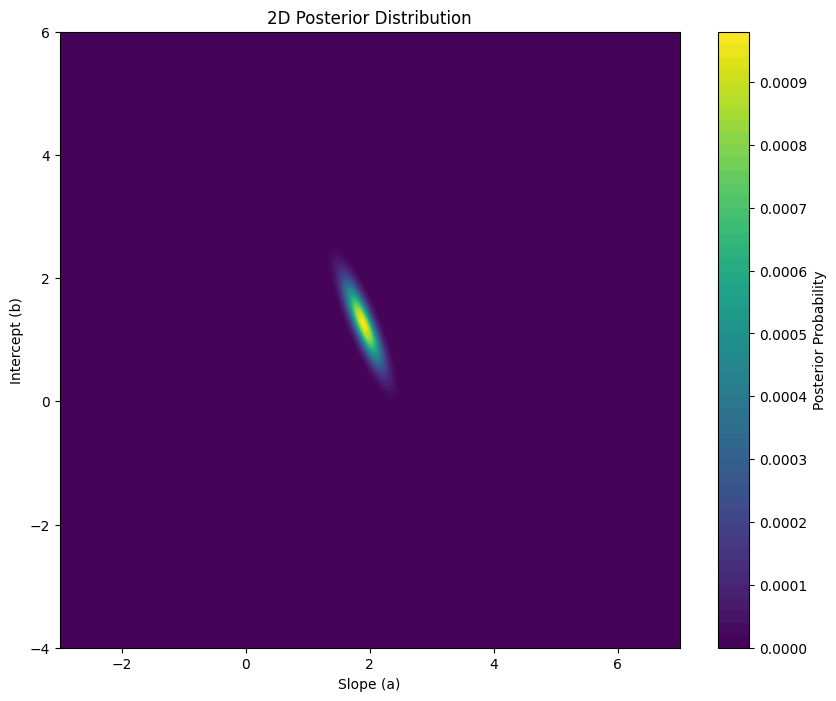

In [23]:
# Convert log-posterior to posterior (exponentiate)
posterior_grid = np.exp(log_posterior_grid)

# Plot the 2D posterior
plt.figure(figsize=(10, 8))
plt.contourf(a_grid, b_grid, posterior_grid.T, levels=50, cmap='viridis')
plt.colorbar(label='Posterior Probability')
plt.xlabel('Slope (a)')
plt.ylabel('Intercept (b)')
plt.title('2D Posterior Distribution')
plt.show()

Now, derive the marginalized posterior probability for $a$ by integrating or summing the posterior over the $b$ axis. Plot your result. Repeat this for the posterior on $b$.

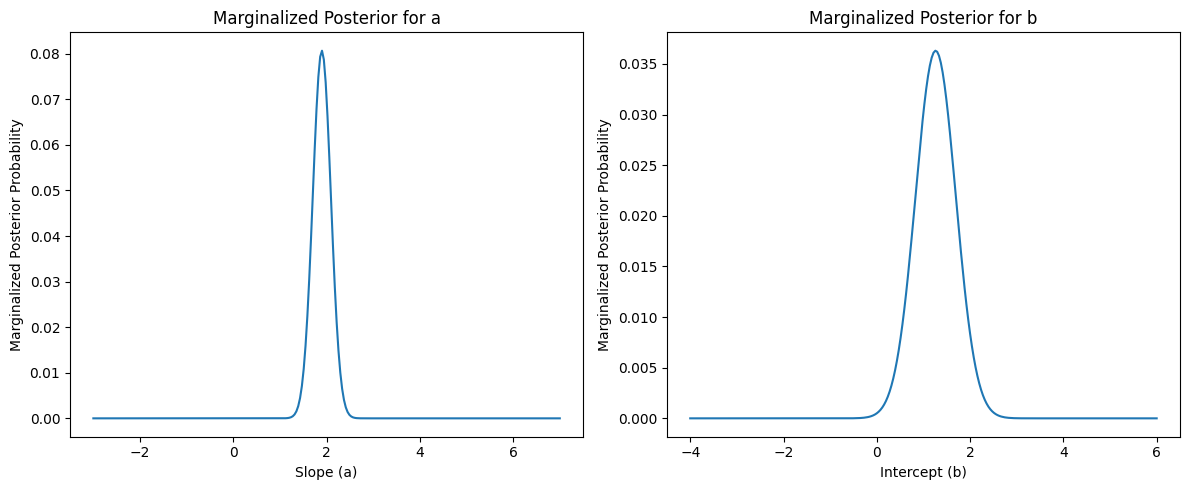

In [24]:
# prompt: Now, derive the marginalized posterior probability for  𝑎  by integrating or summing the posterior over the  𝑏  axis. Plot your result. Repeat this for the posterior on  𝑏 .

import matplotlib.pyplot as plt
import numpy as np
# Marginalize over b to get the posterior for a
posterior_a = np.sum(posterior_grid, axis=1)
# Normalize
posterior_a /= np.sum(posterior_a)

# Marginalize over a to get the posterior for b
posterior_b = np.sum(posterior_grid, axis=0)
# Normalize
posterior_b /= np.sum(posterior_b)

# Plot the marginalized posteriors
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(a_grid, posterior_a)
plt.xlabel('Slope (a)')
plt.ylabel('Marginalized Posterior Probability')
plt.title('Marginalized Posterior for a')

plt.subplot(1, 2, 2)
plt.plot(b_grid, posterior_b)
plt.xlabel('Intercept (b)')
plt.ylabel('Marginalized Posterior Probability')
plt.title('Marginalized Posterior for b')

plt.tight_layout()
plt.show()


In [ ]:
#p_a_marg =

Repeat the above Bayesian parameter analysis for the sinusoidal dataset and 3-parameter fit. Derive marginalized posteriors for $a$, $b$, and $c$.


In [ ]:
def loglikelihood2(vals):
  loglike2 = #### Write down log(likelihood) function
  return loglike2

#### you may wish to use this function - a 3d version of evaluate_on_grid
def gridEvaluateFunction3D(function, xvals, yvals, zvals):
    functionValues = numpy.zeros((len(xvals), len(yvals),len(zvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            for k in range(len(zvals)):
              functionValues[i, j, k] = function([xvals[i], yvals[j], zvals[k]])
    return functionValues


#use data vector with oscillatory feature
xarray = numpy.arange(20.)/5
yarray = numpy.array([1.16100793, 1.42923794, 0.80093107, 1.78104663, 2.75986525, 4.56330262,
 4.1477148,  4.85440368, 2.17825072, 3.86503213, 4.77178222, 6.33519865,
 7.04268761, 4.99445856, 6.05725901, 7.79426178, 7.9263877,  8.77436701,
 9.56089799, 6.47543553])


#see below for example calculation of marginalized posterior for the slope parameter a.
#this evaluation uses only 60 grid points in each dimension
a_grid = numpy.linspace(0.,4.,60)
b_grid = numpy.linspace(-1.,3.,60)
c_grid = numpy.linspace(-3.,1.,60)

logongrid2 = gridEvaluateFunction3D(loglikelihood2,a_grid,b_grid,c_grid)
ongrid2 = numpy.exp(logongrid2)
# note: some care is required to integrate over the correct axes
p_a_marg = numpy.sum(ongrid2,axis=(1,2))


Note the evaluation gets very slow when we make our grid finer! I.e. if we change numpy.linspace(...,60) to a significantly larger number of grid points the algorithm cannot be run. A faster method, which scales well to larger number of parameters, is required... MCMC.

# MCMC


Now we will solve the same problem with a Markov Chain Monte Carlo method. If you have lots of time left, write your own Metropolis Hastings algorithm. Otherwise, examine and add comments explaining the code written below.

In [ ]:
def MCMC(parameters,stepnumber,logPosteriorFn,sigmas):
  chain = numpy.zeros((stepnumber,len(parameters)))
  logProb = numpy.zeros(stepnumber)
  chain[0] = parameters
  logProb[0] = logPosteriorFn(parameters)
  for i in range(1,stepnumber):
    diff = numpy.random.normal(sigmas)
    newParam = chain[i-1]+diff
    newValue = logPosteriorFn(newParam)
    logProbRatio = newValue - logPosteriorFn(chain[i-1])
    if (logProbRatio > 0) or (numpy.exp(logProbRatio) >  numpy.random.uniform()):
      chain[i] = newParam
      logProb[i] = newValue
    else:
      chain[i] = chain[i-1]
      logProb[i] = logProb[i-1]
  return chain, logProb


Now, run a chain as shown below. Plot the values of $a$ vs. the values of $b$ for the first 3000 steps in the chain and explain this plot. Why are the initial steps often excluded?

Generate and plot a histogram of the $a$ values in the chain. Comment on the significance / interpretation of this plot.



In [ ]:
#### can use this along with loglikelihood function to run chains
parameters = numpy.array([1.,1.,1.])
stepnumber = 100000
sigmas = numpy.array([0.1,0.1,0.1])
chain, logProb = MCMC(parameters,stepnumber,loglikelihood2,sigmas)
#### note: chain is chain[stepnumber,parameter_index]

You can also use the corner package to plot the posteriors. Explain what each panel of the plot is showing.

In [ ]:
!source activate statsseminar; pip install corner
import corner
fig = corner.corner(
    chain, bins=15, labels=["$a$", "$b$","$c$"]
)

# Examining the impact of priors

Now examine the impact of priors. Set a prior that imposes a lower bound on one of the parameters.  Then impose a prior such that $P(c) \propto e^{10 c}$. Examine the resulting posterior plots for each case.